In [ ]:
import PySAM.Pvwattsv7 as pv
import PySAM.Lcoefcr as Lcoefcr
import pandas as pd

# Nombre del archivo CSV con datos horarios (el que mostraste)
solar_resource_file = "/home/nicole/proyecto/NicoleTorres/PRUEBA1/Datos/españa.csv"

# Parámetros de ejemplo para el sistema PV
system_capacity_kw = 1000.0
fixed_charge_rate = 0.07
capital_cost = 1_000_000
fixed_operating_cost = 50_000
variable_operating_cost = 0.01

# Crear un modelo PVWatts "desde cero" y asignar el recurso solar
pv_model = pv.new()
pv_model.SolarResource.solar_resource_file = solar_resource_file

# Configurar parámetros mínimos del sistema PV
pv_model.SystemDesign.system_capacity = system_capacity_kw
pv_model.SystemDesign.dc_ac_ratio = 1.2
pv_model.SystemDesign.array_type = 1
pv_model.SystemDesign.azimuth = 180
pv_model.SystemDesign.tilt = 20
pv_model.SystemDesign.gcr = 0.4
pv_model.SystemDesign.inv_eff = 96
pv_model.SystemDesign.losses = 14.0

# Ejecutar la simulación PVWatts
pv_model.execute()

# Obtener la generación anual de energía (kWh)
annual_energy = pv_model.Outputs.annual_energy
print(f"Generación anual de energía PV: {annual_energy} kWh")

# Crear el modelo para cálculo de LCOE
lcoe_model = Lcoefcr.new()

# Asignar valores para el cálculo del LCOE
lcoe_model.SimpleLCOE.annual_energy = annual_energy
lcoe_model.SimpleLCOE.capital_cost = capital_cost
lcoe_model.SimpleLCOE.fixed_charge_rate = fixed_charge_rate
lcoe_model.SimpleLCOE.fixed_operating_cost = fixed_operating_cost
lcoe_model.SimpleLCOE.variable_operating_cost = variable_operating_cost

# Ejecutar el cálculo del LCOE
lcoe_model.execute()

# Obtener el LCOE calculado
lcoe = lcoe_model.Outputs.lcoe_fcr
print(f"LCOE: {lcoe} $/kWh")

# Guardar resultados en un CSV
import pandas as pd
df_results = pd.DataFrame({
    "System_Capacity_kW": [system_capacity_kw],
    "Annual_Energy_kWh": [annual_energy],
    "Capital_Cost_$": [capital_cost],
    "Fixed_Charge_Rate": [fixed_charge_rate],
    "LCOE_$kWh": [lcoe]
})

df_results.to_csv("pv_lcoe_results.csv", index=False)
print("Resultados guardados en pv_lcoe_results.csv")

# ------------------------------------------------------
# Variables que puedes cambiar o iterar:
# - system_capacity_kw: tamaño del sistema PV
# - fixed_charge_rate: tasa de carga fija para el LCOE
# - capital_cost: costo total de la planta
# - fixed_operating_cost: costo operativo fijo anual
# - variable_operating_cost: costo operativo variable ($/kWh)
#
# Además, puedes ajustar parámetros del arreglo PV (azimuth, tilt, gcr, etc.)
# o probar con diferentes archivos de recursos solares.
# ------------------------------------------------------


: 

: 

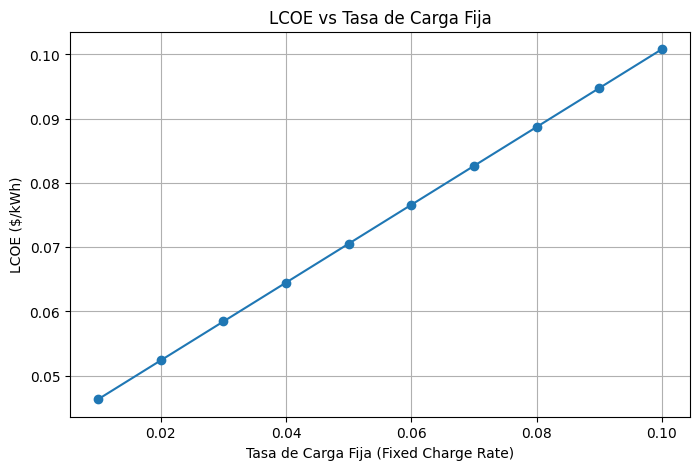

In [3]:
import PySAM.Pvwattsv7 as pv
import PySAM.Lcoefcr as Lcoefcr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#-------------------------
# VARIABLES FIJAS
#-------------------------
solar_resource_file = "/home/cparrado/UNAB/DHTMY_SAM_E_I8SD2G.csv"   # Archivo de recurso solar
system_capacity_kw = 1000.0                     # Capacidad del sistema (kW)
capital_cost = 1_000_000                        # Costo total de capital ($)
fixed_operating_cost = 50_000                   # Costo operativo fijo ($/año)
variable_operating_cost = 0.01                 # Costo operativo variable ($/kWh)
#-------------------------

# Crear el modelo PVWatts
pv_model = pv.new()
pv_model.SolarResource.solar_resource_file = solar_resource_file

# Configurar parámetros del sistema PV
pv_model.SystemDesign.system_capacity = system_capacity_kw
pv_model.SystemDesign.dc_ac_ratio = 1.2
pv_model.SystemDesign.array_type = 1
pv_model.SystemDesign.azimuth = 180
pv_model.SystemDesign.tilt = 20
pv_model.SystemDesign.gcr = 0.4
pv_model.SystemDesign.inv_eff = 96
pv_model.SystemDesign.losses = 14.0

# Ejecutar la simulación PVWatts para obtener la energía anual
pv_model.execute()
annual_energy = pv_model.Outputs.annual_energy

# Iterar sobre diferentes valores de fixed_charge_rate
fcr_values = np.arange(0.01, 0.11, 0.01)  # 0.01, 0.02, ..., 0.1
lcoe_values = []

for fcr in fcr_values:
    lcoe_model = Lcoefcr.new()
    lcoe_model.SimpleLCOE.annual_energy = annual_energy
    lcoe_model.SimpleLCOE.capital_cost = capital_cost
    lcoe_model.SimpleLCOE.fixed_charge_rate = fcr
    lcoe_model.SimpleLCOE.fixed_operating_cost = fixed_operating_cost
    lcoe_model.SimpleLCOE.variable_operating_cost = variable_operating_cost
    
    lcoe_model.execute()
    lcoe = lcoe_model.Outputs.lcoe_fcr
    lcoe_values.append(lcoe)

# Crear un gráfico de LCOE vs Fixed Charge Rate
plt.figure(figsize=(8, 5))
plt.plot(fcr_values, lcoe_values, marker='o', linestyle='-')
plt.xlabel("Tasa de Carga Fija (Fixed Charge Rate)")
plt.ylabel("LCOE ($/kWh)")
plt.title("LCOE vs Tasa de Carga Fija")
plt.grid(True)
plt.show()


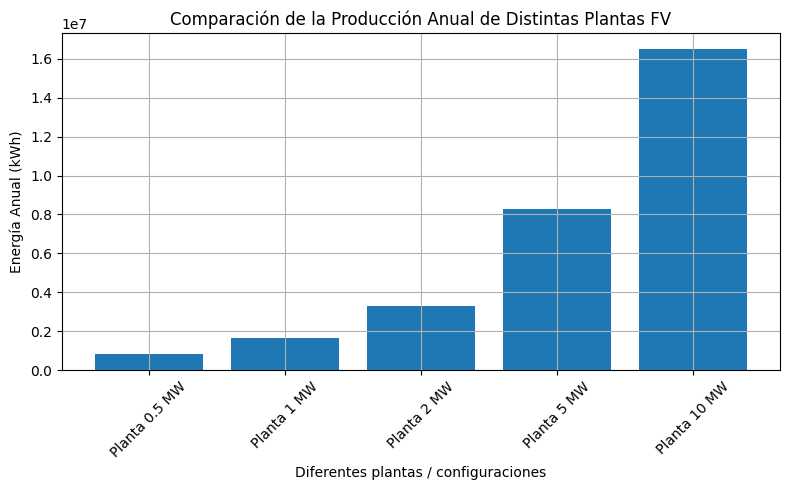

In [4]:
import PySAM.Pvwattsv7 as pv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Archivo de recurso solar (ajusta la ruta a tu caso)
    solar_resource_file = "/home/cparrado/UNAB/DHTMY_SAM_E_I8SD2G.csv"

    # Conjunto de distintas "plantas" (o configuraciones) para comparar
    # Aquí variamos la capacidad nominal, pero puedes crear más variaciones 
    # (diferentes inclinaciones, azimut, etc.)
    plantas = [
        {"nombre": "Planta 0.5 MW",  "capacity_kw": 500,   "dc_ac_ratio": 1.2, "tilt": 20, "azimuth": 180},
        {"nombre": "Planta 1 MW",    "capacity_kw": 1000,  "dc_ac_ratio": 1.2, "tilt": 20, "azimuth": 180},
        {"nombre": "Planta 2 MW",    "capacity_kw": 2000,  "dc_ac_ratio": 1.2, "tilt": 20, "azimuth": 180},
        {"nombre": "Planta 5 MW",    "capacity_kw": 5000,  "dc_ac_ratio": 1.2, "tilt": 20, "azimuth": 180},
        {"nombre": "Planta 10 MW",   "capacity_kw": 10000, "dc_ac_ratio": 1.2, "tilt": 20, "azimuth": 180}
    ]
    
    nombres = []
    energias = []

    for p in plantas:
        # Crear modelo PVWatts nuevo para cada planta
        pv_model = pv.new()
        pv_model.SolarResource.solar_resource_file = solar_resource_file

        # Configurar parámetros
        pv_model.SystemDesign.system_capacity = p["capacity_kw"]
        pv_model.SystemDesign.dc_ac_ratio = p["dc_ac_ratio"]
        pv_model.SystemDesign.array_type = 1    # 1 = techo inclinado, 0 = suelo fijo, etc.
        pv_model.SystemDesign.azimuth = p["azimuth"]
        pv_model.SystemDesign.tilt = p["tilt"]
        pv_model.SystemDesign.gcr = 0.4
        pv_model.SystemDesign.inv_eff = 96
        pv_model.SystemDesign.losses = 14.0

        # Ejecutar simulación
        pv_model.execute()
        
        # Obtener la energía anual [kWh]
        annual_energy = pv_model.Outputs.annual_energy
        
        # Guardar resultados en listas
        nombres.append(p["nombre"])
        energias.append(annual_energy)
    
    # Crear un gráfico de barras con los resultados
    plt.figure(figsize=(8, 5))
    plt.bar(nombres, energias)
    plt.xlabel("Diferentes plantas / configuraciones")
    plt.ylabel("Energía Anual (kWh)")
    plt.title("Comparación de la Producción Anual de Distintas Plantas FV")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
